In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
train.shape

(27000, 24)

# Naive Model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report

earlystopper = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
LR = 0.001

We have a class imbalance problem!

0    21027
1     5973
Name: default.payment.next.month, dtype: int64


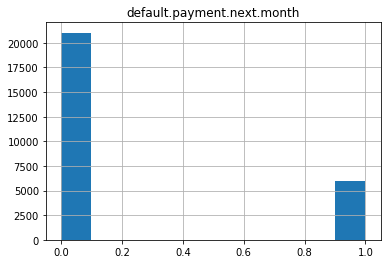

In [6]:
train.hist('default.payment.next.month')
print(train['default.payment.next.month'].value_counts())
plt.show()

In [7]:
y_train = train['default.payment.next.month'] #prendo ultima colonna
y_train = to_categorical(y_train, num_classes=2)

In [8]:
x_train = train.drop('default.payment.next.month', axis=1).values #tolgo ultima colonna

senza nessun preprocessing il valore di loss esplode immediatamente e diventa nan.

In [9]:
model = Sequential()
model.add(Dense(32, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax')) #output
model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=LR), metrics=['accuracy'])

W1018 17:52:57.218874 139921363109696 deprecation.py:506] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32,validation_split=0.1) 

Train on 24300 samples, validate on 2700 samples
Epoch 1/10
24300/24300 [==============================] - 2s 63us/sample - loss: 5992922731664.8740 - acc: 0.7771 - val_loss: 0.6290 - val_acc: 0.7789
Epoch 2/10
24300/24300 [==============================] - 2s 63us/sample - loss: nan - acc: 0.7783 - val_loss: nan - val_acc: 0.7789
Epoch 3/10
24300/24300 [==============================] - 1s 54us/sample - loss: nan - acc: 0.7788 - val_loss: nan - val_acc: 0.7789
Epoch 4/10
24300/24300 [==============================] - 1s 56us/sample - loss: nan - acc: 0.7788 - val_loss: nan - val_acc: 0.7789
Epoch 5/10
24300/24300 [==============================] - 1s 59us/sample - loss: nan - acc: 0.7788 - val_loss: nan - val_acc: 0.7789
Epoch 6/10
24300/24300 [==============================] - 1s 54us/sample - loss: nan - acc: 0.7788 - val_loss: nan - val_acc: 0.7789
Epoch 7/10
24300/24300 [==============================] - 1s 51us/sample - loss: nan - acc: 0.7788 - val_loss: nan - val_acc: 0.7789
Ep

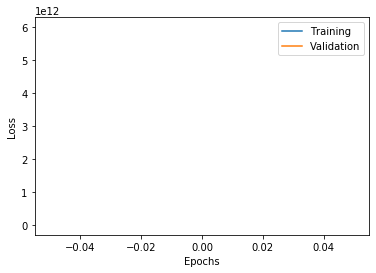

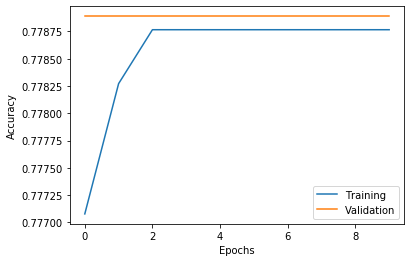

In [11]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
plot_history(history)

# Preprocessing

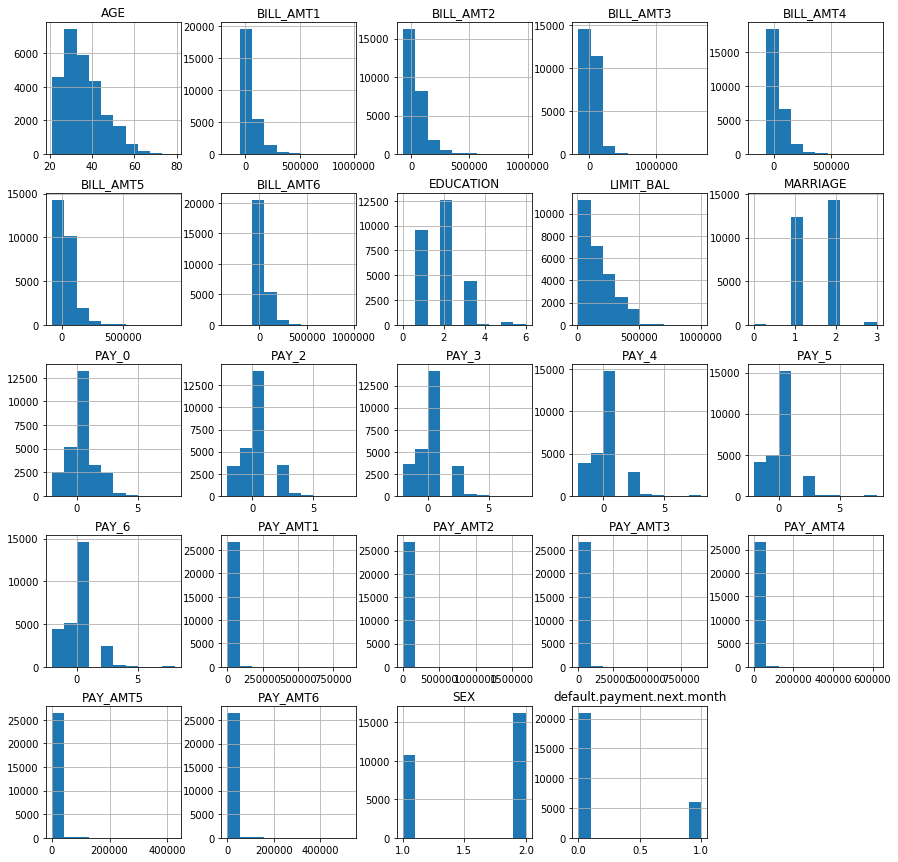

In [12]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

train.hist(figsize = (15,15))
plt.show()

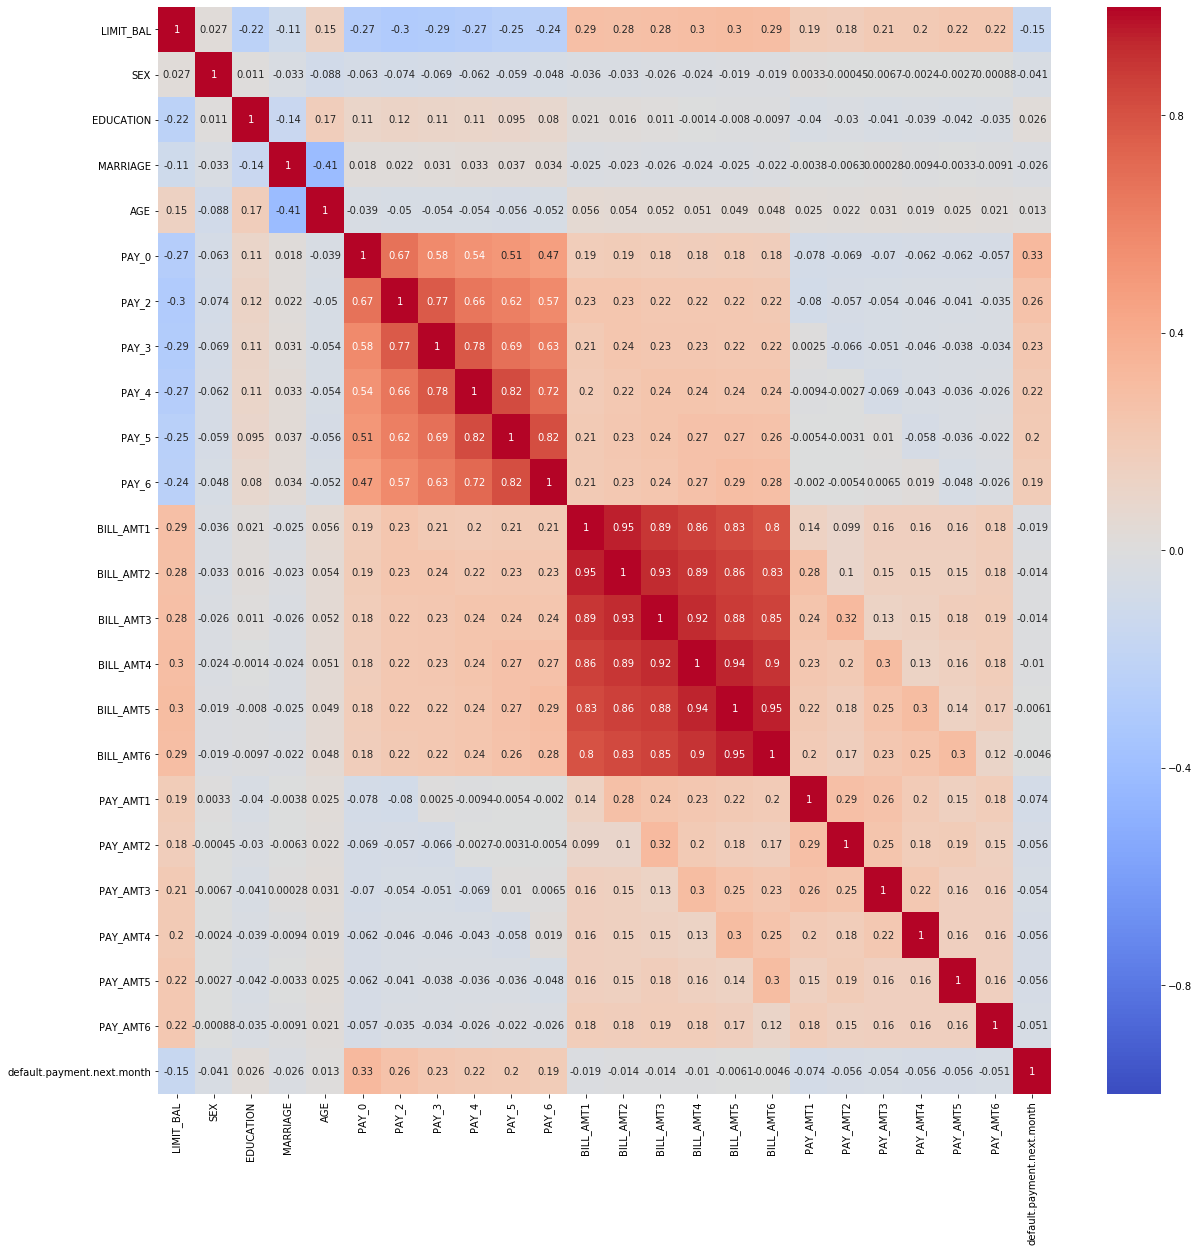

In [13]:
corr = train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm',
            vmax=1, vmin=-1,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

The variables BILL_AMT_x are highly correlated so it's useless to keep all of them!

In [14]:
train_mod = train.copy() # the dataframe that we will modify

train_mod = pd.get_dummies(train_mod, columns=['EDUCATION','MARRIAGE']) 
test_mod = pd.get_dummies(test, columns=['EDUCATION','MARRIAGE'])
#these are categorical so we need to do one hot encoding
X = train_mod.drop('default.payment.next.month',axis=1)
y = train_mod['default.payment.next.month']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.1)
X_test = test_mod

In [15]:
#to the average of BILL_AMT_X and then drop them
X_train.loc[:,'BILL_AMT'] = (np.array(X_train.BILL_AMT1) + np.array(X_train.BILL_AMT2) +
                         np.array(X_train.BILL_AMT3) + np.array(X_train.BILL_AMT4) +
                         np.array(X_train.BILL_AMT5) + np.array(X_train.BILL_AMT6))/6

X_val.loc[:,'BILL_AMT'] = (np.array(X_val.BILL_AMT1) + np.array(X_val.BILL_AMT2) +
                         np.array(X_val.BILL_AMT3) + np.array(X_val.BILL_AMT4) +
                         np.array(X_val.BILL_AMT5) + np.array(X_val.BILL_AMT6))/6

X_test.loc[:,'BILL_AMT'] = (np.array(X_test.BILL_AMT1) + np.array(X_test.BILL_AMT2) +
                         np.array(X_test.BILL_AMT3) + np.array(X_test.BILL_AMT4) +
                         np.array(X_test.BILL_AMT5) + np.array(X_test.BILL_AMT6))/6

X_train.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],
               inplace=True, axis=1)
X_val.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],
               inplace=True, axis=1)
X_test.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],
               inplace=True, axis=1)

/home/pranav/.local/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/pranav/.local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/pranav/.local/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

In [16]:
#the following columns will be standardized
to_stand = ['BILL_AMT', 'LIMIT_BAL', 'AGE',
            'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
for col in to_stand:
    scaler = MinMaxScaler(copy=True).fit(X_train[[col]])
    X_train.loc[:,col] = scaler.transform(X_train[[col]])
    X_val.loc[:,col] = scaler.transform(X_val[[col]])
    X_test.loc[:,col] = scaler.transform(X_test[[col]])
    


/home/pranav/.local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/pranav/.local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/pranav/.local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

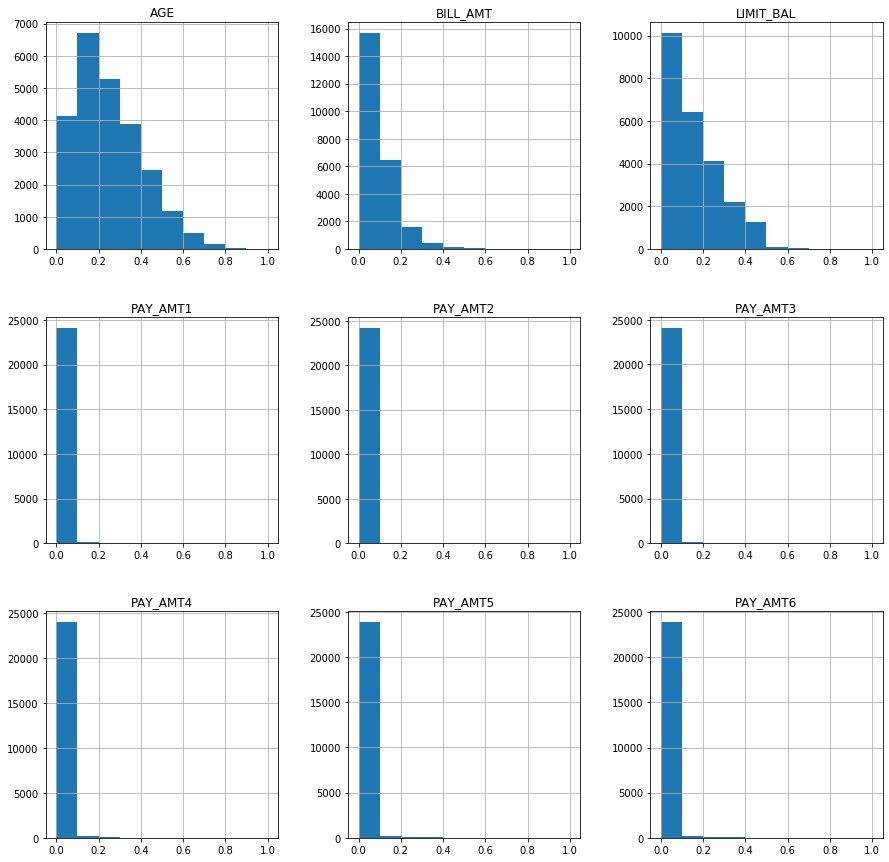

In [17]:
X_train.hist(to_stand, figsize=(15,15))
plt.show()

Qua il codice di come ho fatto una sorta di GridSearch sul numero di strati tra 2 e 5, e il numero di neuroni di ciasun strato,
purtroppo a un tratto ho cancellato l'output e ci mette molto tempo per rieseguire

In [18]:
#hidden_combo_1 = [32, 64]
#hidden_combo_2 = [32, 64]
#hidden_combo_3 = [0, 64, 128]
#hidden_combo_4 = [0, 32, 64]
#hidden_combo_5 = [0, 16, 32]
#best_score = 0
#score = 0

#for h1 in hidden_combo_1:
#  for h2 in hidden_combo_2:
#    for h3 in hidden_combo_3:
#      for h4 in hidden_combo_4:
#        for h5 in hidden_combo_5:
#          model = Sequential()
#          model.add(Dense(h1, input_shape=(X_train.shape[1],), activation='relu'))
#          model.add(Dense(h2, activation='relu'))
#          if h3>0:
#            model.add(Dense(h3, activation='relu'))
#            if h4>0:
#              model.add(Dense(h4, activation='relu'))
#              if h5>0:
#                model.add(Dense(h4, activation='relu'))
#          model.add(Dense(2, activation='softmax')) #output
#          model.compile(loss='categorical_crossentropy',
#                            optimizer=SGD(lr=LR), metrics=['accuracy'])
#          if (h3==0 and h4>0) or (h3==0 and h5>0 or (h4==0 and h5>0)):
#            continue
#          history = model.fit(X_train, y_train_cat, epochs=100, 
#                              batch_size=128, validation_data=(X_val, y_val_cat),
#                              verbose=0, callbacks=[earlystopper])
#          y_pred = np.array(list(map(np.argmax,model.predict(X_val))))
#          score = f1_score(np.array(y_val), y_pred)
#          print(classification_report(np.array(y_val), y_pred))
#          print('h1 {:2} h2 {:2} h3 {:2} h4 {:2} h5 {:2} f1 {:5}'.
#                format(h1, h2, h3, h4, h5,  round(score,3)), end='\n')
#          if score > best_score:
#            best_score = score
#            best_model = model

In [19]:
y_train_cat = to_categorical(y_train, num_classes=2)
y_val_cat = to_categorical(y_val, num_classes=2)

# Models

In [20]:
model_mod = Sequential()

model_mod.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model_mod.add(Dense(64, activation='relu'))
model_mod.add(Dense(32, activation='relu'))
model_mod.add(Dense(32, activation='relu'))

model_mod.add(Dense(2, activation='softmax')) #output
model_mod.compile(loss='categorical_crossentropy',
                     optimizer=SGD(lr=LR), metrics=['accuracy'])

In [21]:
history_mod = model_mod.fit(X_train, y_train_cat, epochs=1000, 
                            batch_size=128, validation_data=(X_val, y_val_cat),
                            callbacks=[earlystopper])

Train on 24300 samples, validate on 2700 samples
Epoch 1/1000
24300/24300 [==============================] - 1s 27us/sample - loss: 0.6763 - acc: 0.6042 - val_loss: 0.6112 - val_acc: 0.7952
Epoch 2/1000
24300/24300 [==============================] - 1s 23us/sample - loss: 0.5853 - acc: 0.7853 - val_loss: 0.5561 - val_acc: 0.7959
Epoch 3/1000
24300/24300 [==============================] - 0s 19us/sample - loss: 0.5477 - acc: 0.7814 - val_loss: 0.5277 - val_acc: 0.7944
Epoch 4/1000
24300/24300 [==============================] - 0s 18us/sample - loss: 0.5271 - acc: 0.7809 - val_loss: 0.5109 - val_acc: 0.7941
Epoch 5/1000
24300/24300 [==============================] - 0s 21us/sample - loss: 0.5146 - acc: 0.7814 - val_loss: 0.5000 - val_acc: 0.7941
Epoch 6/1000
24300/24300 [==============================] - 1s 21us/sample - loss: 0.5064 - acc: 0.7831 - val_loss: 0.4923 - val_acc: 0.7959
Epoch 7/1000
24300/24300 [==============================] - 0s 19us/sample - loss: 0.5003 - acc: 0.7851 -

24300/24300 [==============================] - 0s 19us/sample - loss: 0.4439 - acc: 0.8177 - val_loss: 0.4318 - val_acc: 0.8270
Epoch 116/1000
24300/24300 [==============================] - 0s 15us/sample - loss: 0.4439 - acc: 0.8180 - val_loss: 0.4317 - val_acc: 0.8270
Epoch 117/1000
24300/24300 [==============================] - 0s 20us/sample - loss: 0.4438 - acc: 0.8179 - val_loss: 0.4316 - val_acc: 0.8270
Epoch 118/1000
24300/24300 [==============================] - 1s 22us/sample - loss: 0.4437 - acc: 0.8180 - val_loss: 0.4315 - val_acc: 0.8267
Epoch 119/1000
24300/24300 [==============================] - 1s 21us/sample - loss: 0.4437 - acc: 0.8180 - val_loss: 0.4315 - val_acc: 0.8278
Epoch 120/1000
24300/24300 [==============================] - 0s 15us/sample - loss: 0.4436 - acc: 0.8179 - val_loss: 0.4314 - val_acc: 0.8278
Epoch 121/1000
24300/24300 [==============================] - 1s 22us/sample - loss: 0.4435 - acc: 0.8182 - val_loss: 0.4314 - val_acc: 0.8281
Epoch 122/1000

24300/24300 [==============================] - 1s 23us/sample - loss: 0.4397 - acc: 0.8197 - val_loss: 0.4285 - val_acc: 0.8267
Epoch 230/1000
24300/24300 [==============================] - 0s 16us/sample - loss: 0.4397 - acc: 0.8198 - val_loss: 0.4286 - val_acc: 0.8267
Epoch 231/1000
24300/24300 [==============================] - 0s 17us/sample - loss: 0.4397 - acc: 0.8198 - val_loss: 0.4285 - val_acc: 0.8267
Epoch 232/1000
24300/24300 [==============================] - 0s 20us/sample - loss: 0.4397 - acc: 0.8197 - val_loss: 0.4285 - val_acc: 0.8267
Epoch 233/1000
24300/24300 [==============================] - 1s 21us/sample - loss: 0.4396 - acc: 0.8198 - val_loss: 0.4285 - val_acc: 0.8267
Epoch 234/1000
24300/24300 [==============================] - 0s 20us/sample - loss: 0.4396 - acc: 0.8198 - val_loss: 0.4285 - val_acc: 0.8267
Epoch 235/1000
24300/24300 [==============================] - 0s 14us/sample - loss: 0.4396 - acc: 0.8198 - val_loss: 0.4285 - val_acc: 0.8267
Epoch 236/1000

24300/24300 [==============================] - 1s 26us/sample - loss: 0.4377 - acc: 0.8202 - val_loss: 0.4277 - val_acc: 0.8259
Epoch 344/1000
24300/24300 [==============================] - 1s 22us/sample - loss: 0.4377 - acc: 0.8201 - val_loss: 0.4276 - val_acc: 0.8259
Epoch 345/1000
24300/24300 [==============================] - 1s 25us/sample - loss: 0.4376 - acc: 0.8204 - val_loss: 0.4277 - val_acc: 0.8259
Epoch 346/1000
24300/24300 [==============================] - 1s 23us/sample - loss: 0.4376 - acc: 0.8202 - val_loss: 0.4277 - val_acc: 0.8259
Epoch 347/1000
24300/24300 [==============================] - 0s 19us/sample - loss: 0.4376 - acc: 0.8202 - val_loss: 0.4276 - val_acc: 0.8259
Epoch 348/1000
24300/24300 [==============================] - 1s 23us/sample - loss: 0.4376 - acc: 0.8202 - val_loss: 0.4276 - val_acc: 0.8259
Epoch 349/1000
24300/24300 [==============================] - 1s 24us/sample - loss: 0.4376 - acc: 0.8202 - val_loss: 0.4276 - val_acc: 0.8259
Epoch 350/1000

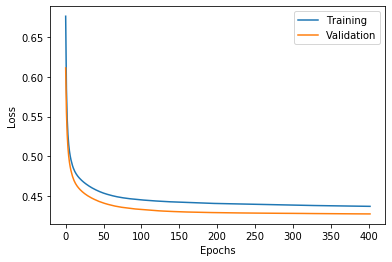

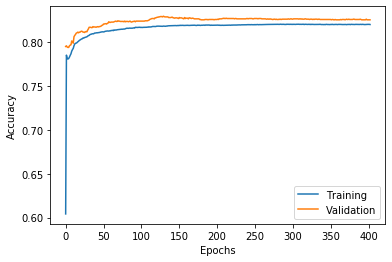

In [22]:
plot_history(history_mod)

In [23]:
y_pred = model_mod.predict_classes(X_val.values)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2123
           1       0.67      0.37      0.47       577

    accuracy                           0.83      2700
   macro avg       0.76      0.66      0.68      2700
weighted avg       0.81      0.83      0.81      2700



Sigmoid activation instead of categorizing and using softmax

In [24]:
model_mod_s = Sequential()
model_mod_s.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model_mod_s.add(Dropout(0.2))
model_mod_s.add(Dense(64, activation='relu'))
model_mod_s.add(Dropout(0.2))
model_mod_s.add(Dense(16, activation='relu'))
model_mod_s.add(Dense(1, activation='sigmoid')) #output
model_mod_s.compile(loss='binary_crossentropy',
                     optimizer=SGD(lr=LR), metrics=['accuracy'])

history_mod_s = model_mod_s.fit(X_train, y_train, epochs=500, 
                                batch_size=128, validation_data=(X_val.values, y_val),
                                callbacks=[earlystopper])

W1018 17:56:56.401081 139921363109696 deprecation.py:323] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 24300 samples, validate on 2700 samples
Epoch 1/500
24300/24300 [==============================] - 1s 45us/sample - loss: 0.6759 - acc: 0.6681 - val_loss: 0.6609 - val_acc: 0.7759
Epoch 2/500
24300/24300 [==============================] - 1s 21us/sample - loss: 0.6437 - acc: 0.7678 - val_loss: 0.6297 - val_acc: 0.7856
Epoch 3/500
24300/24300 [==============================] - 1s 31us/sample - loss: 0.6191 - acc: 0.7782 - val_loss: 0.6043 - val_acc: 0.7863
Epoch 4/500
24300/24300 [==============================] - 1s 28us/sample - loss: 0.5992 - acc: 0.7783 - val_loss: 0.5839 - val_acc: 0.7863
Epoch 5/500
24300/24300 [==============================] - 1s 21us/sample - loss: 0.5837 - acc: 0.7785 - val_loss: 0.5672 - val_acc: 0.7863
Epoch 6/500
24300/24300 [==============================] - 1s 32us/sample - loss: 0.5701 - acc: 0.7783 - val_loss: 0.5535 - val_acc: 0.7863
Epoch 7/500
24300/24300 [==============================] - 1s 29us/sample - loss: 0.5597 - acc: 0.7783 - val_lo

Epoch 59/500
24300/24300 [==============================] - 1s 35us/sample - loss: 0.4748 - acc: 0.8007 - val_loss: 0.4499 - val_acc: 0.8189
Epoch 60/500
24300/24300 [==============================] - 1s 34us/sample - loss: 0.4735 - acc: 0.8006 - val_loss: 0.4495 - val_acc: 0.8196
Epoch 61/500
24300/24300 [==============================] - 1s 33us/sample - loss: 0.4732 - acc: 0.8021 - val_loss: 0.4492 - val_acc: 0.8196
Epoch 62/500
24300/24300 [==============================] - ETA: 0s - loss: 0.4733 - acc: 0.802 - 1s 32us/sample - loss: 0.4728 - acc: 0.8026 - val_loss: 0.4488 - val_acc: 0.8193
Epoch 63/500
24300/24300 [==============================] - 1s 32us/sample - loss: 0.4731 - acc: 0.8012 - val_loss: 0.4485 - val_acc: 0.8196
Epoch 64/500
24300/24300 [==============================] - 1s 29us/sample - loss: 0.4737 - acc: 0.8003 - val_loss: 0.4482 - val_acc: 0.8193
Epoch 65/500
24300/24300 [==============================] - 1s 27us/sample - loss: 0.4724 - acc: 0.8023 - val_loss: 

Epoch 117/500
24300/24300 [==============================] - 1s 29us/sample - loss: 0.4640 - acc: 0.8046 - val_loss: 0.4388 - val_acc: 0.8233
Epoch 118/500
24300/24300 [==============================] - 1s 24us/sample - loss: 0.4616 - acc: 0.8063 - val_loss: 0.4388 - val_acc: 0.8230
Epoch 119/500
24300/24300 [==============================] - 1s 30us/sample - loss: 0.4629 - acc: 0.8069 - val_loss: 0.4387 - val_acc: 0.8233
Epoch 120/500
24300/24300 [==============================] - 1s 30us/sample - loss: 0.4620 - acc: 0.8047 - val_loss: 0.4386 - val_acc: 0.8230
Epoch 121/500
24300/24300 [==============================] - 1s 24us/sample - loss: 0.4612 - acc: 0.8055 - val_loss: 0.4385 - val_acc: 0.8230
Epoch 122/500
24300/24300 [==============================] - 1s 30us/sample - loss: 0.4626 - acc: 0.8042 - val_loss: 0.4384 - val_acc: 0.8230
Epoch 123/500
24300/24300 [==============================] - 1s 30us/sample - loss: 0.4608 - acc: 0.8076 - val_loss: 0.4383 - val_acc: 0.8230
Epoch 

Epoch 175/500
24300/24300 [==============================] - 1s 25us/sample - loss: 0.4559 - acc: 0.8077 - val_loss: 0.4350 - val_acc: 0.8252
Epoch 176/500
24300/24300 [==============================] - 1s 31us/sample - loss: 0.4566 - acc: 0.8080 - val_loss: 0.4349 - val_acc: 0.8252
Epoch 177/500
24300/24300 [==============================] - 1s 28us/sample - loss: 0.4549 - acc: 0.8084 - val_loss: 0.4349 - val_acc: 0.8252
Epoch 178/500
24300/24300 [==============================] - 1s 25us/sample - loss: 0.4572 - acc: 0.8074 - val_loss: 0.4348 - val_acc: 0.8248
Epoch 179/500
24300/24300 [==============================] - 1s 29us/sample - loss: 0.4579 - acc: 0.8056 - val_loss: 0.4348 - val_acc: 0.8248
Epoch 180/500
24300/24300 [==============================] - 1s 26us/sample - loss: 0.4572 - acc: 0.8077 - val_loss: 0.4347 - val_acc: 0.8248
Epoch 181/500
24300/24300 [==============================] - 1s 26us/sample - loss: 0.4586 - acc: 0.8056 - val_loss: 0.4347 - val_acc: 0.8248
Epoch 

Epoch 233/500
24300/24300 [==============================] - 1s 31us/sample - loss: 0.4548 - acc: 0.8099 - val_loss: 0.4331 - val_acc: 0.8241
Epoch 234/500
24300/24300 [==============================] - 1s 24us/sample - loss: 0.4547 - acc: 0.8098 - val_loss: 0.4330 - val_acc: 0.8244
Epoch 235/500
24300/24300 [==============================] - 1s 31us/sample - loss: 0.4541 - acc: 0.8101 - val_loss: 0.4330 - val_acc: 0.8244
Epoch 236/500
24300/24300 [==============================] - 1s 29us/sample - loss: 0.4545 - acc: 0.8097 - val_loss: 0.4330 - val_acc: 0.8241
Epoch 237/500
24300/24300 [==============================] - 1s 24us/sample - loss: 0.4550 - acc: 0.8071 - val_loss: 0.4330 - val_acc: 0.8241
Epoch 238/500
24300/24300 [==============================] - 1s 29us/sample - loss: 0.4540 - acc: 0.8100 - val_loss: 0.4329 - val_acc: 0.8241
Epoch 239/500
24300/24300 [==============================] - 1s 31us/sample - loss: 0.4544 - acc: 0.8093 - val_loss: 0.4329 - val_acc: 0.8241
Epoch 

Epoch 291/500
24300/24300 [==============================] - 1s 30us/sample - loss: 0.4529 - acc: 0.8099 - val_loss: 0.4319 - val_acc: 0.8270
Epoch 292/500
24300/24300 [==============================] - 1s 29us/sample - loss: 0.4533 - acc: 0.8103 - val_loss: 0.4319 - val_acc: 0.8270
Epoch 293/500
24300/24300 [==============================] - 1s 22us/sample - loss: 0.4532 - acc: 0.8100 - val_loss: 0.4319 - val_acc: 0.8270
Epoch 294/500
24300/24300 [==============================] - 1s 28us/sample - loss: 0.4527 - acc: 0.8088 - val_loss: 0.4319 - val_acc: 0.8267
Epoch 295/500
24300/24300 [==============================] - 1s 30us/sample - loss: 0.4533 - acc: 0.8082 - val_loss: 0.4318 - val_acc: 0.8270
Epoch 296/500
24300/24300 [==============================] - 1s 23us/sample - loss: 0.4537 - acc: 0.8090 - val_loss: 0.4318 - val_acc: 0.8270
Epoch 297/500
24300/24300 [==============================] - 1s 31us/sample - loss: 0.4523 - acc: 0.8101 - val_loss: 0.4318 - val_acc: 0.8274
Epoch 

Epoch 349/500
24300/24300 [==============================] - 1s 31us/sample - loss: 0.4523 - acc: 0.8108 - val_loss: 0.4311 - val_acc: 0.8263
Epoch 350/500
24300/24300 [==============================] - 1s 24us/sample - loss: 0.4515 - acc: 0.8111 - val_loss: 0.4311 - val_acc: 0.8263
Epoch 351/500
24300/24300 [==============================] - 1s 31us/sample - loss: 0.4504 - acc: 0.8107 - val_loss: 0.4311 - val_acc: 0.8259
Epoch 352/500
24300/24300 [==============================] - 1s 28us/sample - loss: 0.4517 - acc: 0.8088 - val_loss: 0.4311 - val_acc: 0.8259
Epoch 353/500
24300/24300 [==============================] - 1s 27us/sample - loss: 0.4526 - acc: 0.8092 - val_loss: 0.4311 - val_acc: 0.8259
Epoch 354/500
24300/24300 [==============================] - 1s 30us/sample - loss: 0.4524 - acc: 0.8095 - val_loss: 0.4311 - val_acc: 0.8259
Epoch 355/500
24300/24300 [==============================] - 1s 27us/sample - loss: 0.4514 - acc: 0.8095 - val_loss: 0.4311 - val_acc: 0.8259
Epoch 

Epoch 407/500
24300/24300 [==============================] - 1s 32us/sample - loss: 0.4508 - acc: 0.8121 - val_loss: 0.4307 - val_acc: 0.8270
Epoch 408/500
24300/24300 [==============================] - 1s 31us/sample - loss: 0.4504 - acc: 0.8116 - val_loss: 0.4307 - val_acc: 0.8270
Epoch 409/500
24300/24300 [==============================] - 1s 23us/sample - loss: 0.4497 - acc: 0.8123 - val_loss: 0.4307 - val_acc: 0.8267
Epoch 410/500
24300/24300 [==============================] - 1s 28us/sample - loss: 0.4509 - acc: 0.8109 - val_loss: 0.4307 - val_acc: 0.8270
Epoch 411/500
24300/24300 [==============================] - 1s 29us/sample - loss: 0.4514 - acc: 0.8114 - val_loss: 0.4307 - val_acc: 0.8270
Epoch 412/500
24300/24300 [==============================] - 1s 23us/sample - loss: 0.4518 - acc: 0.8111 - val_loss: 0.4307 - val_acc: 0.8270
Epoch 413/500
24300/24300 [==============================] - 1s 29us/sample - loss: 0.4505 - acc: 0.8101 - val_loss: 0.4307 - val_acc: 0.8270
Epoch 

Epoch 465/500
24300/24300 [==============================] - 1s 26us/sample - loss: 0.4506 - acc: 0.8121 - val_loss: 0.4302 - val_acc: 0.8274
Epoch 466/500
24300/24300 [==============================] - 1s 26us/sample - loss: 0.4497 - acc: 0.8103 - val_loss: 0.4302 - val_acc: 0.8274
Epoch 467/500
24300/24300 [==============================] - 1s 28us/sample - loss: 0.4497 - acc: 0.8119 - val_loss: 0.4302 - val_acc: 0.8274
Epoch 468/500
24300/24300 [==============================] - 1s 26us/sample - loss: 0.4504 - acc: 0.8115 - val_loss: 0.4302 - val_acc: 0.8274
Epoch 469/500
24300/24300 [==============================] - 1s 26us/sample - loss: 0.4505 - acc: 0.8110 - val_loss: 0.4302 - val_acc: 0.8278
Epoch 470/500
24300/24300 [==============================] - 1s 29us/sample - loss: 0.4491 - acc: 0.8119 - val_loss: 0.4302 - val_acc: 0.8278
Epoch 471/500
24300/24300 [==============================] - 1s 26us/sample - loss: 0.4498 - acc: 0.8119 - val_loss: 0.4302 - val_acc: 0.8278
Epoch 

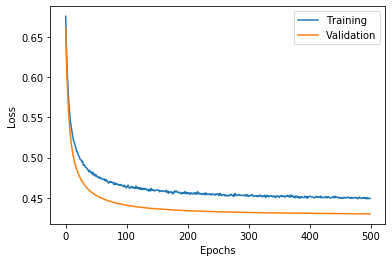

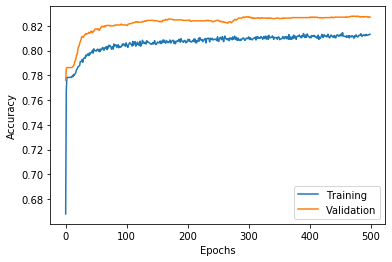

In [25]:
plot_history(history_mod_s)

In [26]:
y_pred = model_mod_s.predict_classes(X_val.values)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90      2123
           1       0.66      0.40      0.49       577

    accuracy                           0.83      2700
   macro avg       0.76      0.67      0.69      2700
weighted avg       0.81      0.83      0.81      2700



# Weights
Let's try with some weights for misclassification

In [27]:
model_weight = Sequential()
model_weight.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model_weight.add(Dropout(0.2))
model_weight.add(Dense(64, activation='relu'))
model_weight.add(Dropout(0.2))
model_weight.add(Dense(16, activation='relu'))
model_weight.add(Dense(2, activation='softmax')) #output
model_weight.compile(loss='categorical_crossentropy',
                     optimizer=SGD(lr=LR), metrics=['accuracy'])

In [28]:
history_weight = model_weight.fit(X_train, y_train_cat, epochs=500, 
                                  batch_size=128, validation_data=(X_val, y_val_cat),
                                  class_weight = {0:0.35, 1:0.65}, callbacks=[earlystopper])

Train on 24300 samples, validate on 2700 samples
Epoch 1/500
24300/24300 [==============================] - 1s 41us/sample - loss: 0.2934 - acc: 0.6835 - val_loss: 0.6379 - val_acc: 0.7215
Epoch 2/500
24300/24300 [==============================] - 0s 20us/sample - loss: 0.2876 - acc: 0.7021 - val_loss: 0.6238 - val_acc: 0.7559
Epoch 3/500
24300/24300 [==============================] - 1s 30us/sample - loss: 0.2834 - acc: 0.7167 - val_loss: 0.6128 - val_acc: 0.7752
Epoch 4/500
24300/24300 [==============================] - 1s 27us/sample - loss: 0.2785 - acc: 0.7312 - val_loss: 0.6035 - val_acc: 0.7911
Epoch 5/500
24300/24300 [==============================] - 0s 20us/sample - loss: 0.2745 - acc: 0.7459 - val_loss: 0.5954 - val_acc: 0.7933
Epoch 6/500
24300/24300 [==============================] - 1s 29us/sample - loss: 0.2731 - acc: 0.7476 - val_loss: 0.5886 - val_acc: 0.7948
Epoch 7/500
24300/24300 [==============================] - 1s 29us/sample - loss: 0.2707 - acc: 0.7588 - val_lo

24300/24300 [==============================] - 1s 30us/sample - loss: 0.2390 - acc: 0.7964 - val_loss: 0.4849 - val_acc: 0.8126
Epoch 117/500
24300/24300 [==============================] - 1s 33us/sample - loss: 0.2395 - acc: 0.7960 - val_loss: 0.4848 - val_acc: 0.8119
Epoch 118/500
24300/24300 [==============================] - 1s 34us/sample - loss: 0.2392 - acc: 0.7950 - val_loss: 0.4846 - val_acc: 0.8119
Epoch 119/500
24300/24300 [==============================] - 1s 23us/sample - loss: 0.2386 - acc: 0.7941 - val_loss: 0.4844 - val_acc: 0.8122
Epoch 120/500
24300/24300 [==============================] - 1s 33us/sample - loss: 0.2383 - acc: 0.7967 - val_loss: 0.4843 - val_acc: 0.8119
Epoch 121/500
24300/24300 [==============================] - 1s 30us/sample - loss: 0.2389 - acc: 0.7964 - val_loss: 0.4840 - val_acc: 0.8122
Epoch 122/500
24300/24300 [==============================] - 1s 27us/sample - loss: 0.2382 - acc: 0.7946 - val_loss: 0.4837 - val_acc: 0.8122
Epoch 123/500
24300/

Epoch 174/500
24300/24300 [==============================] - 1s 26us/sample - loss: 0.2361 - acc: 0.7970 - val_loss: 0.4769 - val_acc: 0.8126
Epoch 175/500
24300/24300 [==============================] - 1s 30us/sample - loss: 0.2362 - acc: 0.7995 - val_loss: 0.4767 - val_acc: 0.8130
Epoch 176/500
24300/24300 [==============================] - 1s 26us/sample - loss: 0.2362 - acc: 0.7986 - val_loss: 0.4767 - val_acc: 0.8126
Epoch 177/500
24300/24300 [==============================] - 1s 28us/sample - loss: 0.2358 - acc: 0.7983 - val_loss: 0.4767 - val_acc: 0.8126
Epoch 178/500
24300/24300 [==============================] - 1s 28us/sample - loss: 0.2354 - acc: 0.8000 - val_loss: 0.4767 - val_acc: 0.8126
Epoch 179/500
24300/24300 [==============================] - 1s 25us/sample - loss: 0.2362 - acc: 0.7982 - val_loss: 0.4767 - val_acc: 0.8126
Epoch 180/500
24300/24300 [==============================] - 1s 28us/sample - loss: 0.2353 - acc: 0.7991 - val_loss: 0.4765 - val_acc: 0.8130
Epoch 

Epoch 232/500
24300/24300 [==============================] - 1s 30us/sample - loss: 0.2339 - acc: 0.7990 - val_loss: 0.4721 - val_acc: 0.8126
Epoch 233/500
24300/24300 [==============================] - 1s 32us/sample - loss: 0.2330 - acc: 0.8012 - val_loss: 0.4720 - val_acc: 0.8126
Epoch 234/500
24300/24300 [==============================] - 1s 33us/sample - loss: 0.2335 - acc: 0.8015 - val_loss: 0.4720 - val_acc: 0.8130
Epoch 235/500
24300/24300 [==============================] - 1s 31us/sample - loss: 0.2335 - acc: 0.8031 - val_loss: 0.4719 - val_acc: 0.8126
Epoch 236/500
24300/24300 [==============================] - 1s 23us/sample - loss: 0.2331 - acc: 0.8007 - val_loss: 0.4718 - val_acc: 0.8126
Epoch 237/500
24300/24300 [==============================] - 1s 29us/sample - loss: 0.2343 - acc: 0.7991 - val_loss: 0.4718 - val_acc: 0.8130
Epoch 238/500
24300/24300 [==============================] - 1s 31us/sample - loss: 0.2345 - acc: 0.8016 - val_loss: 0.4719 - val_acc: 0.8130
Epoch 

Epoch 290/500
24300/24300 [==============================] - 1s 23us/sample - loss: 0.2332 - acc: 0.7998 - val_loss: 0.4691 - val_acc: 0.8170
Epoch 291/500
24300/24300 [==============================] - 1s 30us/sample - loss: 0.2320 - acc: 0.8014 - val_loss: 0.4692 - val_acc: 0.8159
Epoch 292/500
24300/24300 [==============================] - 1s 29us/sample - loss: 0.2326 - acc: 0.8018 - val_loss: 0.4689 - val_acc: 0.8167
Epoch 293/500
24300/24300 [==============================] - 1s 24us/sample - loss: 0.2330 - acc: 0.8007 - val_loss: 0.4690 - val_acc: 0.8167
Epoch 294/500
24300/24300 [==============================] - 1s 30us/sample - loss: 0.2327 - acc: 0.7984 - val_loss: 0.4691 - val_acc: 0.8167
Epoch 295/500
24300/24300 [==============================] - 1s 29us/sample - loss: 0.2323 - acc: 0.8023 - val_loss: 0.4690 - val_acc: 0.8167
Epoch 296/500
24300/24300 [==============================] - 1s 23us/sample - loss: 0.2325 - acc: 0.8040 - val_loss: 0.4689 - val_acc: 0.8170
Epoch 

Epoch 00347: early stopping


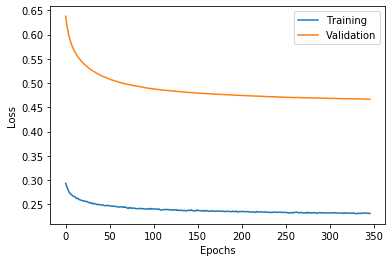

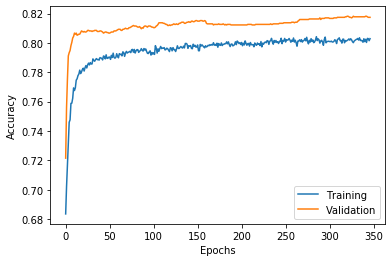

In [29]:
plot_history(history_weight)

In [30]:
y_pred = model_weight.predict_classes(X_val.values)
print(classification_report(np.array(y_val), y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      2123
           1       0.59      0.47      0.52       577

    accuracy                           0.82      2700
   macro avg       0.73      0.69      0.70      2700
weighted avg       0.81      0.82      0.81      2700



In [34]:
#Created a way to save the weighted average F-measure for each epoch
from tensorflow.keras.callbacks import Callback

class ModelMetrics(Callback):
    def on_train_begin(self,logs={}):
        self.weighted_average_f1_train = []
        self.weighted_average_f1_val = []
        
    def on_epoch_end(self, batch, logs={}):
        #train
        y_train_pred=self.model.predict_classes(X_train.values)

        _f1_1=f1_score(y_train,y_train_pred, pos_label=1)
        _f1_0=f1_score(y_train,y_train_pred, pos_label=0)
        n_0 = len(y_train[y_train==0])
        n_1 = len(y_train[y_train==1]) 
        _weighted_average_f1_train = (n_0*_f1_0 + n_1*_f1_0)/len(y_train)


        #validation
        y_val_pred=self.model.predict_classes(X_val.values)

        _f1_1=f1_score(y_val,y_val_pred, pos_label=1)
        _f1_0=f1_score(y_val,y_val_pred, pos_label=0)
        n_0 = len(y_val[y_val==0])
        n_1 = len(y_val[y_val==1]) 
        _weighted_average_f1_val = (n_0*_f1_0 + n_1*_f1_0)/len(y_val)


        self.weighted_average_f1_train.append(_weighted_average_f1_train)
        self.weighted_average_f1_val.append(_weighted_average_f1_val)

        #print("  train f1 {}, validation f1 {}".format(round(_weighted_average_f1_train, 3), 
        #                                             round(_weighted_average_f1_val,3)))


weight_f1 = ModelMetrics()

In [35]:
model_weight_s = Sequential()
model_weight_s.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model_weight_s.add(Dropout(0.2))
model_weight_s.add(Dense(64, activation='relu'))
model_weight_s.add(Dropout(0.2))
model_weight_s.add(Dense(16, activation='relu'))
model_weight_s.add(Dense(1, activation='sigmoid')) #output
model_weight_s.compile(loss='binary_crossentropy',
                     optimizer=SGD(lr=LR))

history_weight = model_weight_s.fit(X_train, y_train, epochs=200, 
                                  batch_size=128, validation_data=(X_val, y_val),
                                  class_weight = {0:0.35, 1:0.65}, callbacks=[earlystopper, weight_f1])

Train on 24300 samples, validate on 2700 samples
Epoch 1/200
24300/24300 [==============================] - 2s 78us/sample - loss: 0.2765 - val_loss: 0.6217
Epoch 2/200
24300/24300 [==============================] - 1s 47us/sample - loss: 0.2743 - val_loss: 0.6139
Epoch 3/200
24300/24300 [==============================] - 1s 43us/sample - loss: 0.2729 - val_loss: 0.6068
Epoch 4/200
24300/24300 [==============================] - 1s 46us/sample - loss: 0.2712 - val_loss: 0.5999
Epoch 5/200
24300/24300 [==============================] - 1s 42us/sample - loss: 0.2691 - val_loss: 0.5936
Epoch 6/200
24300/24300 [==============================] - 1s 47us/sample - loss: 0.2688 - val_loss: 0.5877
Epoch 7/200
24300/24300 [==============================] - 1s 41us/sample - loss: 0.2671 - val_loss: 0.5823
Epoch 8/200
24300/24300 [==============================] - 1s 47us/sample - loss: 0.2655 - val_loss: 0.5771
Epoch 9/200
24300/24300 [==============================] - 1s 50us/sample - loss: 0.264

Epoch 76/200
24300/24300 [==============================] - 1s 49us/sample - loss: 0.2392 - val_loss: 0.4874
Epoch 77/200
24300/24300 [==============================] - 1s 41us/sample - loss: 0.2388 - val_loss: 0.4871
Epoch 78/200
24300/24300 [==============================] - 1s 50us/sample - loss: 0.2389 - val_loss: 0.4870
Epoch 79/200
24300/24300 [==============================] - 1s 41us/sample - loss: 0.2389 - val_loss: 0.4868
Epoch 80/200
24300/24300 [==============================] - 1s 47us/sample - loss: 0.2391 - val_loss: 0.4866
Epoch 81/200
24300/24300 [==============================] - 1s 39us/sample - loss: 0.2385 - val_loss: 0.4864
Epoch 82/200
24300/24300 [==============================] - 1s 46us/sample - loss: 0.2381 - val_loss: 0.4862
Epoch 83/200
24300/24300 [==============================] - 1s 43us/sample - loss: 0.2385 - val_loss: 0.4861
Epoch 84/200
24300/24300 [==============================] - 1s 45us/sample - loss: 0.2387 - val_loss: 0.4859
Epoch 85/200
24300/

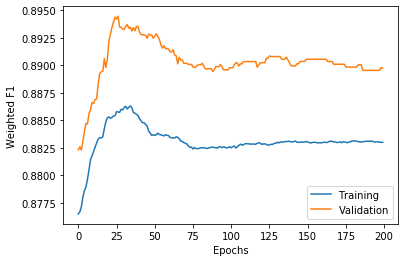

In [36]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Weighted F1')
plt.plot(weight_f1.weighted_average_f1_train)
plt.plot(weight_f1.weighted_average_f1_val)
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

In [37]:
y_pred = model_weight_s.predict_classes(X_val.values)
print(classification_report(np.array(y_val), y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2123
           1       0.61      0.45      0.52       577

    accuracy                           0.82      2700
   macro avg       0.73      0.68      0.70      2700
weighted avg       0.81      0.82      0.81      2700



# SMOTE
As we saw in the beginning the dataset has a class imbalance problem, so we try to use SMOTE to correct this problem a little bit

In [38]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [39]:
X_train_sm, y_train_sm = SMOTE().fit_sample(X_train, y_train)
y_train_cat_sm = to_categorical(y_train_sm, num_classes=2)

In [40]:
model_smote = Sequential()
model_smote.add(Dense(64, input_shape=(X_train_sm.shape[1],), activation='relu'))
model_smote.add(Dense(32, activation='relu'))
model_smote.add(Dense(128, activation='relu'))
model_smote.add(Dense(64, activation='relu'))
model_smote.add(Dense(16, activation='relu'))
model_smote.add(Dense(2, activation='softmax')) #output
model_smote.compile(loss='categorical_crossentropy',optimizer=SGD(lr=LR), metrics=['accuracy'])

In [41]:
history_smote = model_smote.fit(X_train_sm, y_train_cat_sm, epochs=500, batch_size=128, 
                                validation_data=(X_val.values, y_val_cat), callbacks=[earlystopper])

Train on 37808 samples, validate on 2700 samples
Epoch 1/500
37808/37808 [==============================] - 1s 32us/sample - loss: 0.6959 - acc: 0.5126 - val_loss: 0.6821 - val_acc: 0.6070
Epoch 2/500
37808/37808 [==============================] - 1s 26us/sample - loss: 0.6843 - acc: 0.5815 - val_loss: 0.6801 - val_acc: 0.6037
Epoch 3/500
37808/37808 [==============================] - 1s 21us/sample - loss: 0.6747 - acc: 0.6089 - val_loss: 0.6704 - val_acc: 0.6541
Epoch 4/500
37808/37808 [==============================] - 1s 27us/sample - loss: 0.6650 - acc: 0.6368 - val_loss: 0.6598 - val_acc: 0.6952
Epoch 5/500
37808/37808 [==============================] - 1s 21us/sample - loss: 0.6554 - acc: 0.6593 - val_loss: 0.6497 - val_acc: 0.7481
Epoch 6/500
37808/37808 [==============================] - 1s 26us/sample - loss: 0.6464 - acc: 0.6721 - val_loss: 0.6410 - val_acc: 0.7593
Epoch 7/500
37808/37808 [==============================] - 1s 24us/sample - loss: 0.6381 - acc: 0.6774 - val_lo

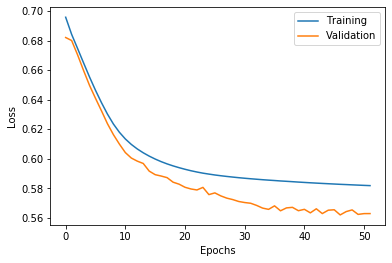

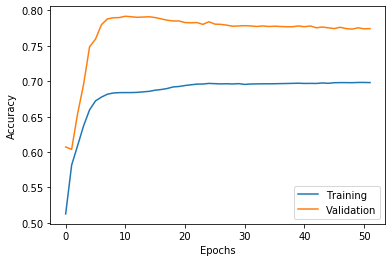

In [42]:
plot_history(history_smote)

In [43]:
y_pred = model_smote.predict_classes(X_val.values)
print(classification_report(np.array(y_val), y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      2123
           1       0.48      0.57      0.52       577

    accuracy                           0.77      2700
   macro avg       0.68      0.70      0.69      2700
weighted avg       0.79      0.77      0.78      2700



# UnderSampling
Let's try undersampling

In [44]:
from imblearn.under_sampling import RandomUnderSampler

In [45]:
under = RandomUnderSampler().fit_sample(X_train, y_train)
X_train_un = under[0]
y_train_cat_un = to_categorical(under[1], num_classes=2)

In [55]:
earlystopper = EarlyStopping(monitor='loss', patience=10, verbose=1)
model_under = Sequential()
model_under.add(Dense(64, input_shape=(X_train_un.shape[1],), activation='relu'))
model_under.add(Dense(128, activation='sigmoid'))
model_under.add(Dense(64, activation='relu'))
model_under.add(Dense(32, activation='relu'))
model_under.add(Dense(2, activation='softmax')) #output
model_under.compile(loss='binary_crossentropy',optimizer=SGD(lr=LR), metrics=['accuracy'])

In [56]:
history_under = model_under.fit(X_train_un, y_train_cat_un, epochs=500, batch_size=128, 
                                validation_data=(X_val.values, y_val_cat), callbacks=[earlystopper])

Train on 10792 samples, validate on 2700 samples
Epoch 1/500
10792/10792 [==============================] - 1s 83us/sample - loss: 0.7059 - acc: 0.5001 - val_loss: 0.6417 - val_acc: 0.7870
Epoch 2/500
10792/10792 [==============================] - 0s 40us/sample - loss: 0.6869 - acc: 0.5423 - val_loss: 0.6674 - val_acc: 0.7685
Epoch 3/500
10792/10792 [==============================] - 0s 23us/sample - loss: 0.6835 - acc: 0.6154 - val_loss: 0.6800 - val_acc: 0.7252
Epoch 4/500
10792/10792 [==============================] - 0s 37us/sample - loss: 0.6817 - acc: 0.6624 - val_loss: 0.6795 - val_acc: 0.7181
Epoch 5/500
10792/10792 [==============================] - 0s 43us/sample - loss: 0.6802 - acc: 0.6686 - val_loss: 0.6754 - val_acc: 0.7581
Epoch 6/500
10792/10792 [==============================] - 0s 40us/sample - loss: 0.6786 - acc: 0.6736 - val_loss: 0.6755 - val_acc: 0.7270
Epoch 7/500
10792/10792 [==============================] - 0s 41us/sample - loss: 0.6772 - acc: 0.6764 - val_lo

Epoch 59/500
10792/10792 [==============================] - 0s 36us/sample - loss: 0.6205 - acc: 0.6901 - val_loss: 0.6079 - val_acc: 0.7926
Epoch 60/500
10792/10792 [==============================] - 0s 21us/sample - loss: 0.6198 - acc: 0.6890 - val_loss: 0.6123 - val_acc: 0.7856
Epoch 61/500
10792/10792 [==============================] - 0s 16us/sample - loss: 0.6190 - acc: 0.6890 - val_loss: 0.6026 - val_acc: 0.7967
Epoch 62/500
10792/10792 [==============================] - 0s 36us/sample - loss: 0.6184 - acc: 0.6893 - val_loss: 0.6036 - val_acc: 0.7956
Epoch 63/500
10792/10792 [==============================] - 0s 34us/sample - loss: 0.6177 - acc: 0.6895 - val_loss: 0.6123 - val_acc: 0.7856
Epoch 64/500
10792/10792 [==============================] - 0s 35us/sample - loss: 0.6171 - acc: 0.6897 - val_loss: 0.6055 - val_acc: 0.7937
Epoch 65/500
10792/10792 [==============================] - 0s 36us/sample - loss: 0.6164 - acc: 0.6894 - val_loss: 0.6097 - val_acc: 0.7859
Epoch 66/500


10792/10792 [==============================] - 0s 36us/sample - loss: 0.5888 - acc: 0.7035 - val_loss: 0.5625 - val_acc: 0.7941
Epoch 174/500
10792/10792 [==============================] - 0s 37us/sample - loss: 0.5887 - acc: 0.7029 - val_loss: 0.5756 - val_acc: 0.7856
Epoch 175/500
10792/10792 [==============================] - 0s 36us/sample - loss: 0.5886 - acc: 0.7022 - val_loss: 0.5679 - val_acc: 0.7881
Epoch 176/500
10792/10792 [==============================] - 0s 32us/sample - loss: 0.5886 - acc: 0.7028 - val_loss: 0.5767 - val_acc: 0.7852
Epoch 177/500
10792/10792 [==============================] - 0s 21us/sample - loss: 0.5885 - acc: 0.7034 - val_loss: 0.5770 - val_acc: 0.7844
Epoch 178/500
10792/10792 [==============================] - 0s 35us/sample - loss: 0.5883 - acc: 0.7029 - val_loss: 0.5705 - val_acc: 0.7867
Epoch 179/500
10792/10792 [==============================] - 0s 37us/sample - loss: 0.5883 - acc: 0.7034 - val_loss: 0.5763 - val_acc: 0.7848
Epoch 180/500
10792/

Epoch 231/500
10792/10792 [==============================] - 0s 35us/sample - loss: 0.5854 - acc: 0.7029 - val_loss: 0.5775 - val_acc: 0.7796
Epoch 232/500
10792/10792 [==============================] - 0s 19us/sample - loss: 0.5854 - acc: 0.7025 - val_loss: 0.5740 - val_acc: 0.7804
Epoch 233/500
10792/10792 [==============================] - 0s 33us/sample - loss: 0.5854 - acc: 0.7028 - val_loss: 0.5713 - val_acc: 0.7819
Epoch 234/500
10792/10792 [==============================] - 0s 37us/sample - loss: 0.5852 - acc: 0.7023 - val_loss: 0.5744 - val_acc: 0.7804
Epoch 235/500
10792/10792 [==============================] - 0s 37us/sample - loss: 0.5852 - acc: 0.7017 - val_loss: 0.5688 - val_acc: 0.7830
Epoch 236/500
10792/10792 [==============================] - 0s 36us/sample - loss: 0.5851 - acc: 0.7033 - val_loss: 0.5702 - val_acc: 0.7826
Epoch 237/500
10792/10792 [==============================] - 0s 31us/sample - loss: 0.5852 - acc: 0.7025 - val_loss: 0.5742 - val_acc: 0.7804
Epoch 

Epoch 289/500
10792/10792 [==============================] - 0s 36us/sample - loss: 0.5832 - acc: 0.7027 - val_loss: 0.5594 - val_acc: 0.7830
Epoch 290/500
10792/10792 [==============================] - 0s 36us/sample - loss: 0.5833 - acc: 0.7016 - val_loss: 0.5745 - val_acc: 0.7774
Epoch 291/500
10792/10792 [==============================] - 0s 37us/sample - loss: 0.5833 - acc: 0.7027 - val_loss: 0.5665 - val_acc: 0.7815
Epoch 292/500
10792/10792 [==============================] - 0s 29us/sample - loss: 0.5832 - acc: 0.7022 - val_loss: 0.5778 - val_acc: 0.7748
Epoch 293/500
10792/10792 [==============================] - 0s 32us/sample - loss: 0.5833 - acc: 0.7028 - val_loss: 0.5683 - val_acc: 0.7800
Epoch 294/500
10792/10792 [==============================] - 0s 37us/sample - loss: 0.5832 - acc: 0.7026 - val_loss: 0.5609 - val_acc: 0.7819
Epoch 295/500
10792/10792 [==============================] - 0s 36us/sample - loss: 0.5831 - acc: 0.7027 - val_loss: 0.5591 - val_acc: 0.7826
Epoch 

Epoch 347/500
10792/10792 [==============================] - 0s 20us/sample - loss: 0.5816 - acc: 0.7025 - val_loss: 0.5809 - val_acc: 0.7704
Epoch 348/500
10792/10792 [==============================] - 0s 31us/sample - loss: 0.5818 - acc: 0.7016 - val_loss: 0.5603 - val_acc: 0.7811
Epoch 349/500
10792/10792 [==============================] - 0s 30us/sample - loss: 0.5816 - acc: 0.7030 - val_loss: 0.5647 - val_acc: 0.7793
Epoch 350/500
10792/10792 [==============================] - 0s 30us/sample - loss: 0.5815 - acc: 0.7023 - val_loss: 0.5524 - val_acc: 0.7852
Epoch 351/500
10792/10792 [==============================] - 0s 28us/sample - loss: 0.5815 - acc: 0.7026 - val_loss: 0.5681 - val_acc: 0.7781
Epoch 352/500
10792/10792 [==============================] - 0s 35us/sample - loss: 0.5815 - acc: 0.7026 - val_loss: 0.5670 - val_acc: 0.7785
Epoch 353/500
10792/10792 [==============================] - 0s 34us/sample - loss: 0.5815 - acc: 0.7027 - val_loss: 0.5757 - val_acc: 0.7744
Epoch 

Epoch 462/500
10792/10792 [==============================] - 0s 34us/sample - loss: 0.5794 - acc: 0.7027 - val_loss: 0.5612 - val_acc: 0.7796
Epoch 463/500
10792/10792 [==============================] - 0s 26us/sample - loss: 0.5793 - acc: 0.7027 - val_loss: 0.5631 - val_acc: 0.7785
Epoch 464/500
10792/10792 [==============================] - 0s 21us/sample - loss: 0.5793 - acc: 0.7032 - val_loss: 0.5625 - val_acc: 0.7785
Epoch 465/500
10792/10792 [==============================] - 0s 33us/sample - loss: 0.5793 - acc: 0.7031 - val_loss: 0.5616 - val_acc: 0.7793
Epoch 466/500
10792/10792 [==============================] - 0s 35us/sample - loss: 0.5793 - acc: 0.7027 - val_loss: 0.5622 - val_acc: 0.7793
Epoch 467/500
10792/10792 [==============================] - 0s 32us/sample - loss: 0.5793 - acc: 0.7030 - val_loss: 0.5537 - val_acc: 0.7837
Epoch 468/500
10792/10792 [==============================] - 0s 31us/sample - loss: 0.5791 - acc: 0.7033 - val_loss: 0.5700 - val_acc: 0.7752
Epoch 

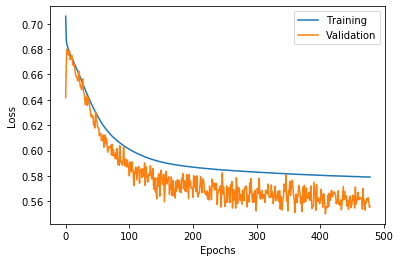

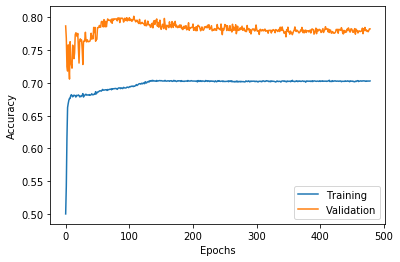

In [57]:
plot_history(history_under)

In [58]:
y_pred = np.array(list(map(np.argmax,model_under.predict(X_val))))
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      2123
           1       0.49      0.58      0.53       577

    accuracy                           0.78      2700
   macro avg       0.69      0.71      0.69      2700
weighted avg       0.80      0.78      0.79      2700



In [50]:
#ricostruisco i dati di partenza unendo i due insiemi
X = pd.concat([X_train,X_val])
y = pd.concat([y_train, y_val])

In [51]:
earlystopper = EarlyStopping(monitor='loss', patience=3, verbose=1)#non c'è più un validation set
model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #output
model.compile(loss='binary_crossentropy',
                     optimizer=SGD(lr=LR))

history_weight = model.fit(X, y, epochs=200, 
                                  batch_size=128,
                                  class_weight = {0:0.35, 1:0.65}, callbacks=[earlystopper])

Epoch 1/200
27000/27000 [==============================] - 1s 53us/sample - loss: 0.2862
Epoch 2/200
27000/27000 [==============================] - 1s 27us/sample - loss: 0.2820
Epoch 3/200
27000/27000 [==============================] - 1s 32us/sample - loss: 0.2781
Epoch 4/200
27000/27000 [==============================] - 1s 27us/sample - loss: 0.2759
Epoch 5/200
27000/27000 [==============================] - 1s 30us/sample - loss: 0.2738
Epoch 6/200
27000/27000 [==============================] - 1s 30us/sample - loss: 0.2717
Epoch 7/200
27000/27000 [==============================] - 1s 33us/sample - loss: 0.2712
Epoch 8/200
27000/27000 [==============================] - 1s 31us/sample - loss: 0.2696
Epoch 9/200
27000/27000 [==============================] - 1s 26us/sample - loss: 0.2682
Epoch 10/200
27000/27000 [==============================] - 1s 27us/sample - loss: 0.2671
Epoch 11/200
27000/27000 [==============================] - 1s 28us/sample - loss: 0.2662
Epoch 12/200
27000/

In [52]:
y_pred_test = model.predict_classes(X_test.values)

In [53]:
y_pred_test.reshape(3000,)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [54]:
#già fatto una volta...
#np.savetxt('Pranav_Kasela_846965_score1.txt', y_pred_test.reshape(3000,), fmt='%d')